<a href="https://colab.research.google.com/github/tausif04/Data-Mining-and-Machine-Learning-Lab/blob/main/K_means_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA


In [28]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/My Dataset/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [29]:
print(df.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [30]:
#droping unnecessary student_id column
df = df.drop(columns=['student_id','parental_education_level'])

#manually mapping
diet_quality_order = ['Poor', 'Fair', 'Good']
internet_quality_order = ['Poor', 'Average', 'Good']
# parent_edu_order = ['High School', 'Associate', 'Bachelor', 'Master']

#ordinal encodingS
df['diet_quality'] = df['diet_quality'].map({k: i for i, k in enumerate(diet_quality_order)})
df['internet_quality'] = df['internet_quality'].map({k: i for i, k in enumerate(internet_quality_order)})
# df['parental_education_level'] = df['parental_education_level'].map({k: i for i, k in enumerate(parent_edu_order)})

#Binary Encoding
df.columns = df.columns.str.strip()
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})

# Feature engineering
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
df['sleep_sufficient'] = df['sleep_hours'].apply(lambda x: 1 if x >= 7 else 0) #Creates a binary column: 1 if the student sleeps 7 or more hours, otherwise 0
                                                                               #Binary features are simple and helpful in classification models or as interaction variables.


In [31]:
from sklearn.preprocessing import StandardScaler
numeric_features = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score', 'total_screen_time'
]

# Standard scaling
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time,sleep_sufficient
0,1.084551,0,-2.418068,-1.114064,-0.669750,0,0.092426,1.248120,1,1.461166,1,0.900186,1,-0.793922,-1.266536,1
1,-0.215870,0,2.281707,0.251315,0.446965,0,1.401696,-1.525661,2,1.461166,1,0.900186,0,1.800846,0.484551,0
2,0.217604,1,-1.464491,0.507324,-0.483631,0,1.135584,1.248120,0,-1.008689,0,-1.559339,0,-2.091307,0.046779,1
3,1.084551,0,-1.736942,1.190013,-0.762810,0,-1.397800,2.227102,0,0.473224,2,-1.559339,1,-2.535616,0.359473,1
4,-0.649344,0,0.987566,1.616694,-1.228108,0,0.720450,-1.280916,1,-0.020747,2,-1.559339,0,-0.189661,0.359473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.217604,0,-0.647139,-1.711417,-0.204452,0,-0.759132,0.840211,1,-0.514718,2,0.197465,1,0.384980,-1.391613,1
996,-1.516291,0,-0.442801,-1.284736,0.540025,1,0.198871,0.269138,0,-1.008689,1,0.197465,1,-0.219282,-0.578609,0
997,-0.215870,1,-0.374688,0.080643,-0.483631,0,-2.366448,0.024393,2,0.967195,2,1.251547,1,-0.308144,-0.265915,0
998,1.518025,1,1.260017,1.360685,-0.669750,1,1.689097,0.921793,1,-1.502660,1,-1.559339,0,0.005835,0.547089,1


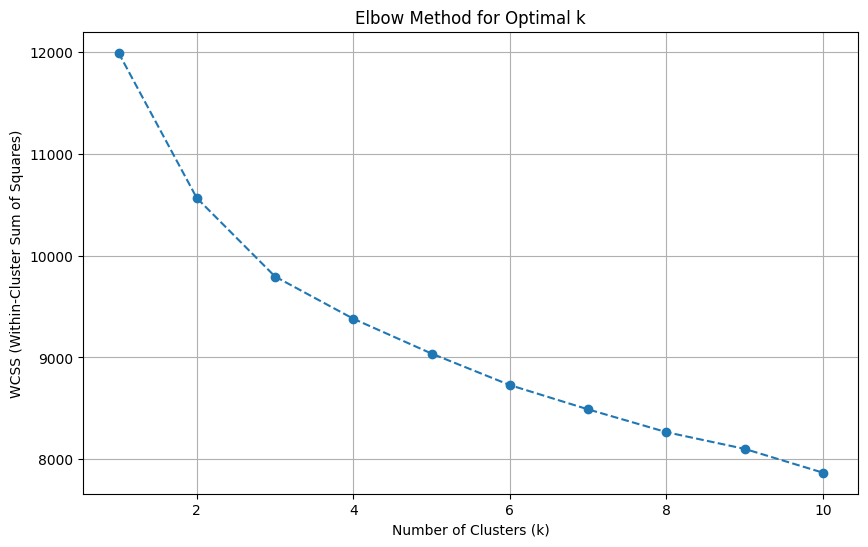

In [37]:
# calculated the Within-Cluster Sum of Squares (WCSS) to help you find the optimal number of clusters. This is a common technique known as the "Elbow Method."
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.savefig('elbow_method.png')
